# CareerFoundry 4.9 Task 2

## Step 1:

In [4]:
# Import data libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [66]:
# Import the dataset 
path = '/Users/vinhdao/Documents/Instacart Basket Analysis'

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'aggregated_ords_prods_merge.pkl'))

## Step 3: Create the histogram for "order_hour_of_day"

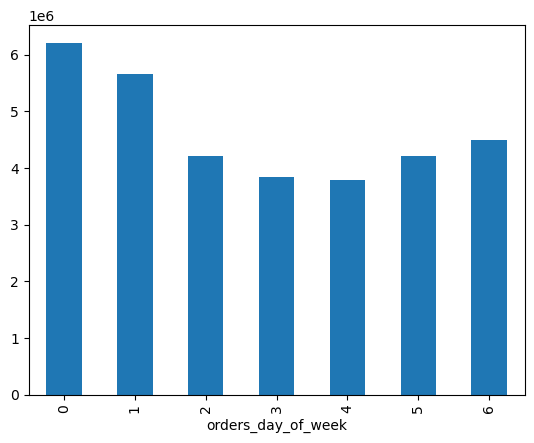

In [88]:
bar1 = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

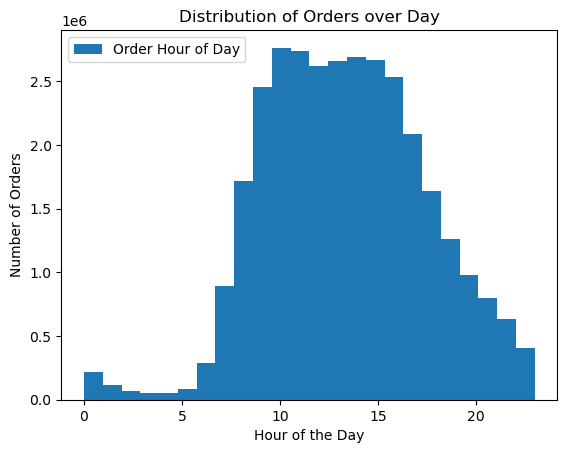

In [72]:
# Plot the histogram
hist = ords_prods_merge['order_hour_of_day'].plot.hist(bins=24, alpha= 1, label='Order Hour of Day')

# Add a title
plt.title('Distribution of Orders over Day')

# Add x and y labels
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Conclusion

- The highest number of orders occur between 10 AM and 3 PM, indicating that this is the most active period for placing orders.

- There is significantly less activity during the early morning hours (from midnight to 6 AM). Activity gradually increases from around 7 AM onwards.

- After 6 PM, the number of orders starts to decline and continues to drop as it gets later into the night.

## Step 4:

In [23]:
# check the dataset
ords_prods_customers = ords_prods_merge.drop(columns = ['_merge'])

ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   eval_set                object 
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  order_hour_of_day       int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  price_range_loc         object 
 15  prices_range_loc        object 
 16  busiest_day             object 
 17  busiest_period_of_day   object 
 18  max_order               int64  
 19  average_spend           float64
 20  spender_flag            object 
 21  Customer_frequency      float

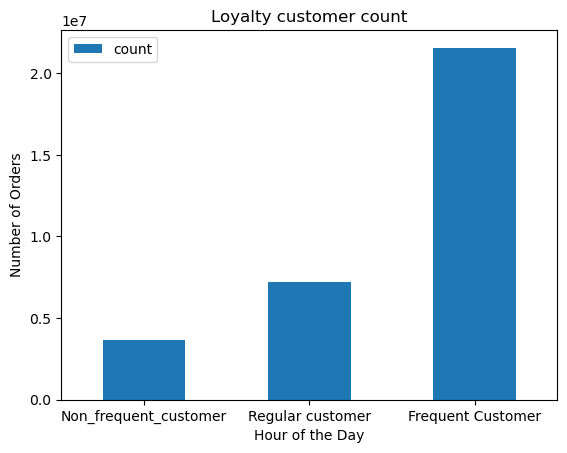

In [112]:
# Plot the bar chart

bar = ords_prods_customers['frequency_flag'].value_counts().sort_values().plot.bar()

# Add a title
plt.title('Loyalty customer count')

# Add x and y labels
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

# Add a legend
plt.legend()

plt.xticks(rotation=0)

# Show the plot
plt.show()

## Step 5: Sampling for checking the difference in expenditure

In [46]:
# Create a random sample

np.random.seed(4)

In [48]:
# Sampling Data set split 70/30

dev = np.random.rand(len(ords_prods_customers)) <= 0.7

In [50]:
# Store 70% of the sample in the big dataframe

big = ords_prods_customers[dev]

In [15]:
small = ords_prods_customers[~dev]

In [51]:
# Check the len 

len(ords_prods_customers)

32434212

In [52]:
# Check the len total

len(big) + len(small) 

32434212

In [80]:
df_2 = small[['order_hour_of_day','prices']]

In [58]:
df_2

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8
...,...,...
32434188,1,13.5
32434191,4,13.5
32434199,6,13.5
32434204,2,13.5


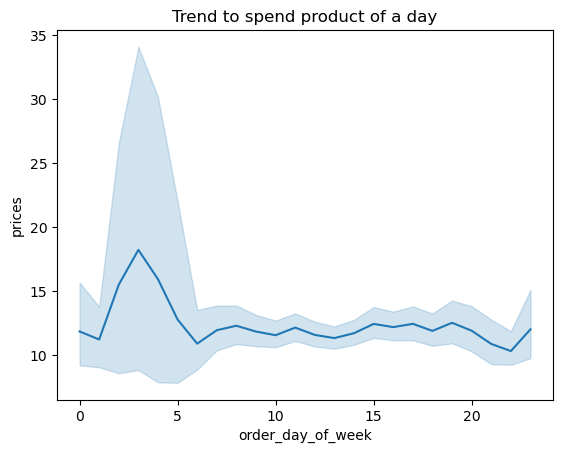

In [84]:
# Plot the line graph

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# Add a title
plt.title('Trend to spend product of a day')

# Add x and y labels
plt.xlabel('order_day_of_week')
plt.ylabel('prices')

# Show the plot
plt.show()

## Step 6:

In [118]:
# Create a new dataframe 

df3 = small[['Age','n_dependants']]

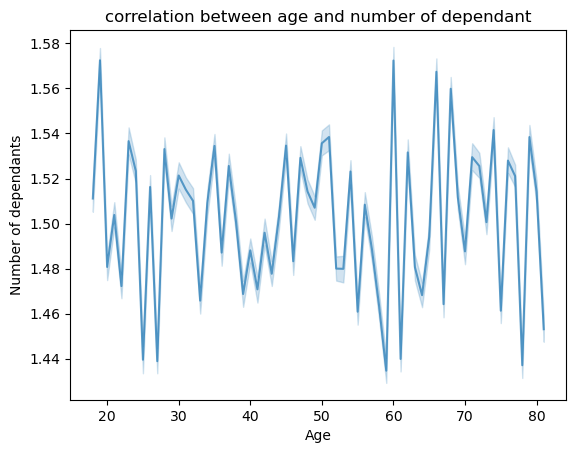

In [120]:
# Plot the line graph
linecon = sns.lineplot(data = df3, alpha = 0.7, x='Age', y='n_dependants')

# Add title
plt.title('correlation between age and number of dependant')

# Add x and y labels
plt.xlabel('Age')
plt.ylabel('Number of dependants')

# Show the plot
plt.show()
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','correlationagedependant.png'))

The result from the graph suggest that there are no clear correlation between the age and the number of dependants 

## Step 7: Connection between age and spending power

In [44]:
df_4 = small[['Age','income']]

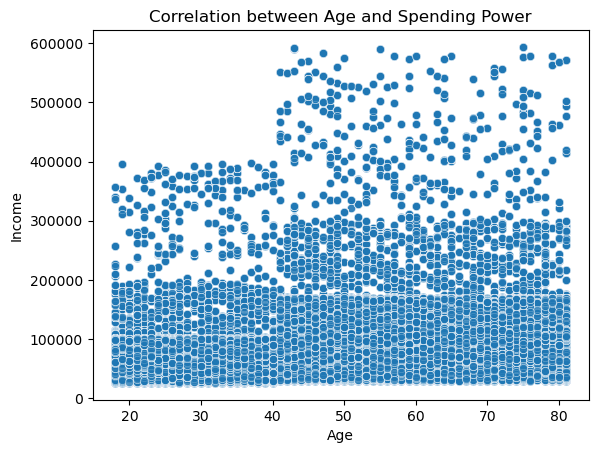

In [54]:
# draw scatterplot

scatin = sns.scatterplot(data = df_4, alpha = 0.7, x = 'Age', y = 'income')

# set a title
plt.title('Correlation between Age and Spending Power')

# Set the x and y labels
plt.xlabel('Age')
plt.ylabel('Income')

# Show the plot
plt.show()

## Description:

There are several comments from the graph

### Income Distribution Across Ages:

- The income levels appear to be widely spread across all age groups, from 20 to 80 years old.
- There is a significant cluster of individuals with an income range from 0 to 300,000 across all age groups, indicating that this is the most common income range.

### Higher Income at Older Ages:

- A noticeable trend is that higher incomes (above 300,000) are more prevalent among older individuals, particularly those aged 50 and above. This may suggest that individuals tend to earn more as they age, possibly due to accumulated experience, seniority, and career progression.

### Income Plateau:

- There appears to be a plateau in income for younger individuals (below 50 years), where incomes rarely exceed 300,000.
- This plateau might indicate that younger individuals are either at the early stages of their careers or in positions with lower earning potential.

### Outliers considerations:

- There are several outliers with extremely high incomes (close to or above 500,000) across various age groups, suggesting that exceptionally high earning potential exists at various life stages, though it is less common.

### No Clear Correlation:

- Despite the observed trends, there doesn't appear to be a very strong correlation between age and income. The scatter plot shows a wide spread of incomes across all ages, indicating that age alone may not be a strong predictor of income.

## Step 8:

In [46]:
# Export the histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','histogram.png'))

In [114]:
# Export the bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar.png'))

In [90]:
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar1.png'))

In [86]:
# Export the line first line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','order_day.png'))

In [50]:
# Export the second line chart

linecon.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_dependant.png'))

In [51]:
# Export the scatterplot

scatin.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatt.png'))